# Tutorial 4

**Rémy BARBERET
Mélissa BUCZKO
Léo CHARDON
Mathilde CORRADI
Antoine COURCELLE
E5FI groupe 1I**

In [23]:
import os

import numpy as np
import wave
from scipy.io.wavfile import read
import matplotlib as mpl
import matplotlib.pyplot as plt

## Task 1

a)

In [26]:
def load_wav(file):
    input_data = read(file)
    audio = input_data[1]
    return audio, len(input_data[1])

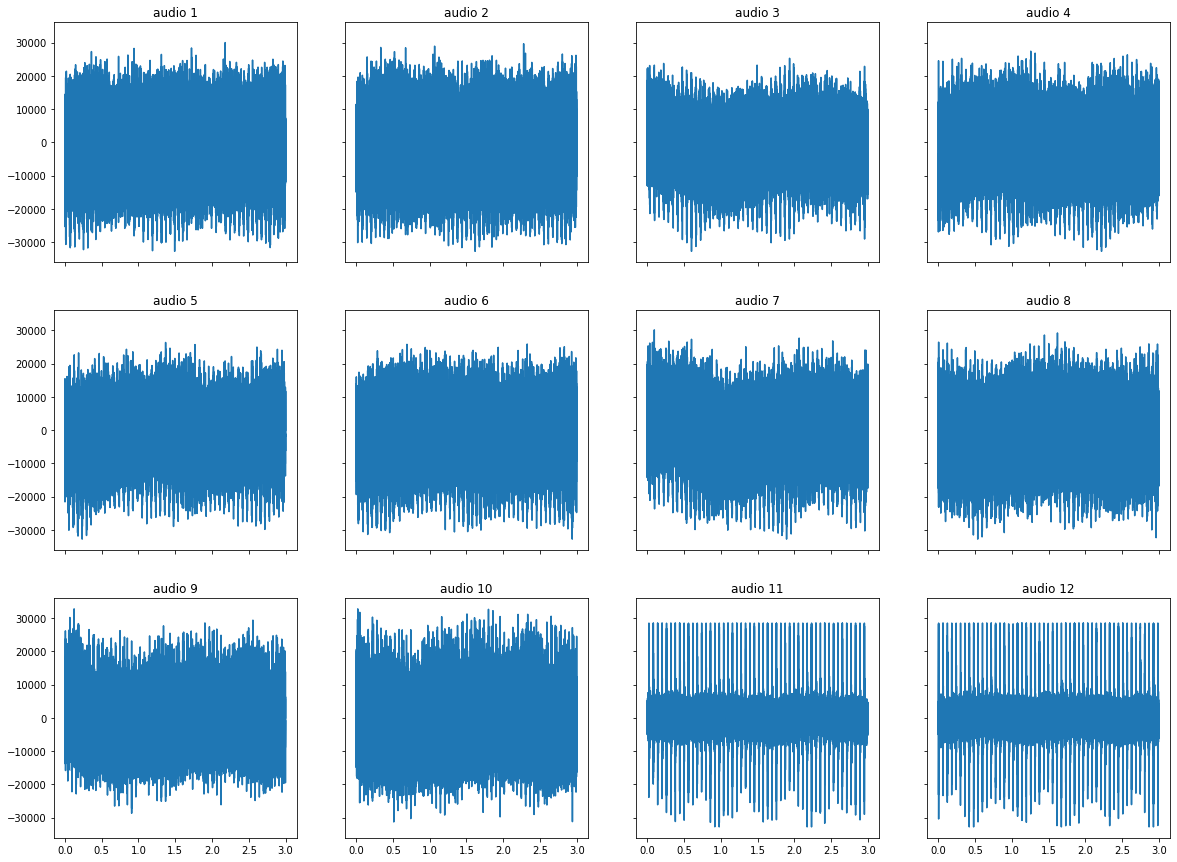

In [35]:
directory = "files"
data = list()
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    data.append(load_wav(f))

n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        axs[i, j].plot(np.linspace(0, 3, data[n][1]), data[n][0])
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1

Les premieres échantillons ont une amplitudes comprise entre -25000 et 25000.
Ensuite, les 2 derniers échantillons, on peut observer de nombreux IMPACTS et l'amplitude hors impact est très réduite.
On peut donc conclure que l'engrenage devient défaillant

In [37]:
GMF = 330 
Z1 = 20
Z2 = 21
F1 = GMF / Z1
F2 = GMF / Z2
T1 = 1 / F1
T2 = 1 / F2
print(f"T1={T1}\nT2={T2}")

T1=0.06060606060606061
T2=0.06363636363636364


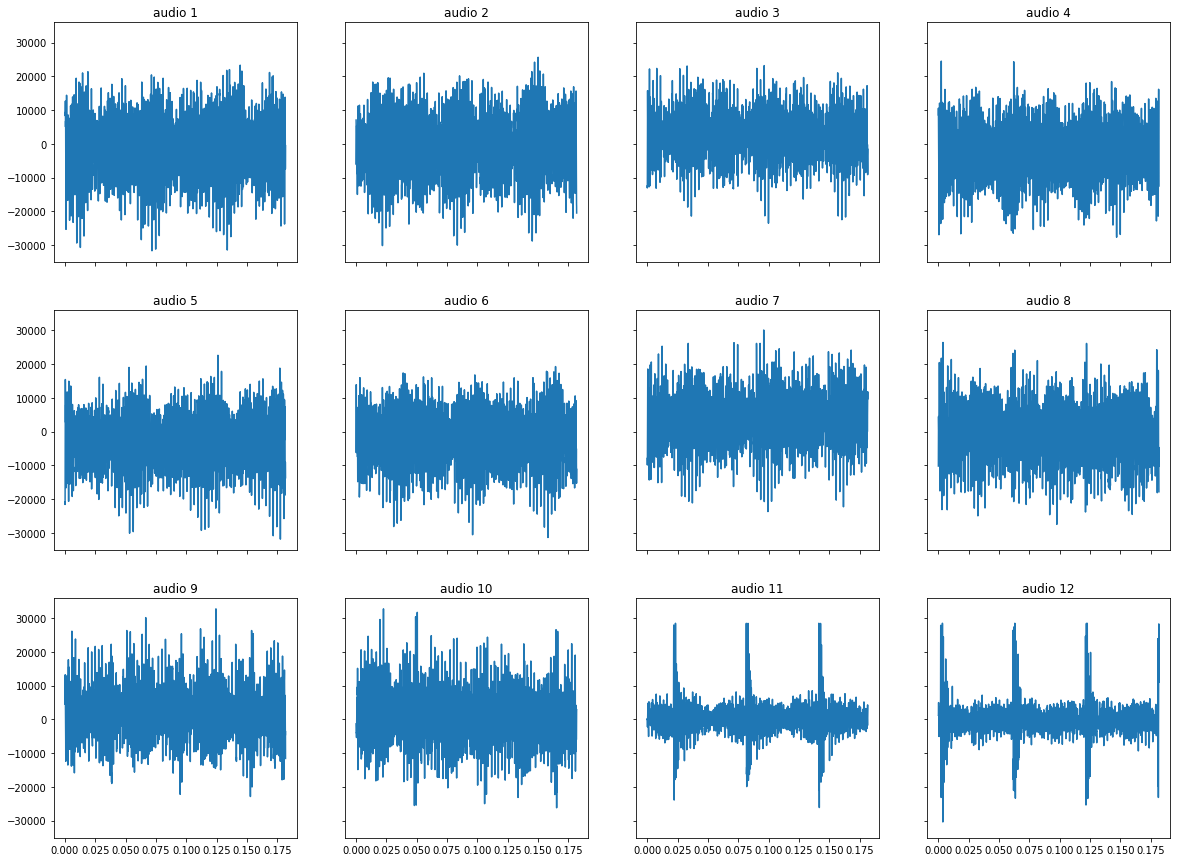

In [62]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        nmax = int(3 * T1 * 20000)
        axs[i, j].plot(np.linspace(0, 3 * T1, nmax), data[n][0][0: nmax])
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1

On voit qu'il y a des impacts qui apparaissent petit à petit à partir du 8ème enregistrement.
Ensuite, le disfonctionnement se confirme à l'audio numéro 11 où on voit clairement les impacts.

## Task 2

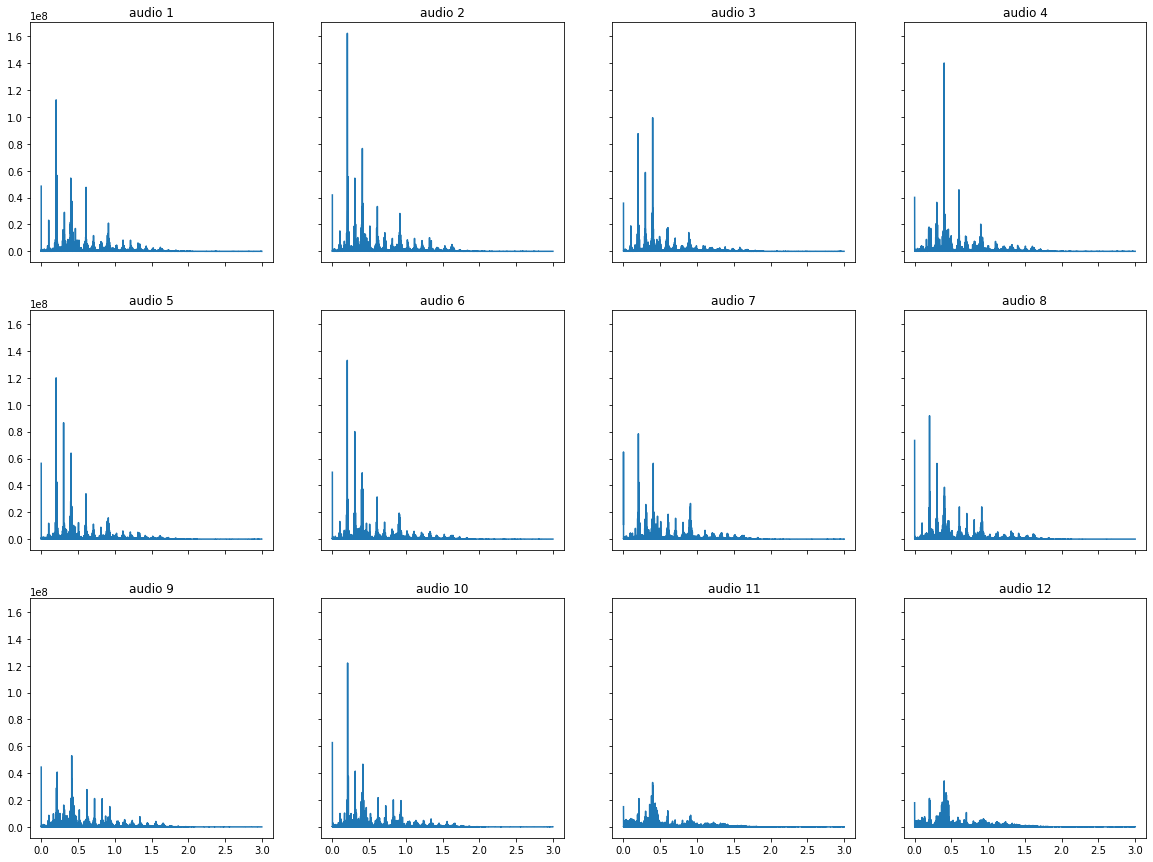

In [82]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        x = np.linspace(0, 3, data[n][1] // 2)
        y = np.fft.fft(data[n][0])
        axs[i, j].plot(x, abs(y.real[0: 30000]))
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1

On remarque qu'il y a une perte d'amplitude qui est particulièrement prononcé à partir de l'audio 7.

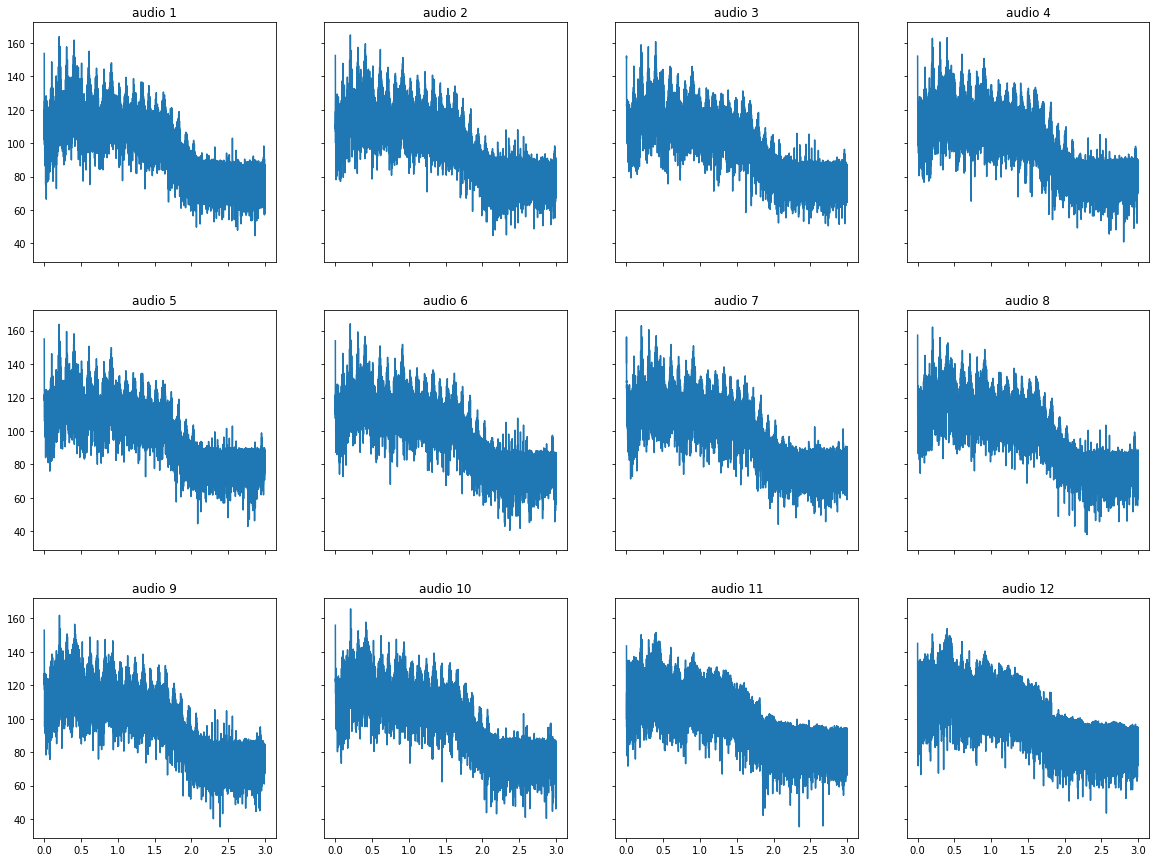

In [99]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        x = np.linspace(0, 3, data[n][1] // 2)
        y = np.fft.fft(data[n][0])
        magnitude = np.sqrt(y.real ** 2 + y.imag ** 2)
        db = 20 * np.log10(np.abs(magnitude))
        axs[i, j].plot(x, abs(db[0: 30000]))
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1